<h1 style="text-align:center">Multi-DOF Example</h1>
<h3 style="text-align:center"> MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/"> http://www.ucs.louisiana.edu/~jev9637/</a></p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/Spring_mass_pendulum.png" alt="An Mass-Spring-Pendulum System" width=40%><br>
    <strong>Figure 1: An Undamped Multi-Degree-of-Freedom System</strong>
</p>
<br>

This notebook demonstrates the analysis of the system shown in Figure 1. Mass $m_1$ is attached to ground via a spring and constrained to move horizontally. Its horizontal motion from equilibrium is described by $x$. Mass $m_2$ is suspended from the center of $m_1$ via a massless, inextensible, inflexible cable of length $l$. The angle of this cable from horizontal is described by $\theta$. The equations of motion for the system are:

$ \quad \left(m_1 + m_2\right) \ddot{x} - m_2 l \ddot{\theta} + k x = f $

$ \quad -m_2 l \ddot{x} + m_2 l^2 \ddot{\theta} + m_2 g l \theta = 0 $

We could also write this equation in matrix form:

$ \quad \begin{bmatrix}m_1 + m_2 & -m_2 l \\ -m_2 l & \hphantom{-}m_2 l^2\end{bmatrix}\begin{bmatrix}\ddot{x} \\ \ddot{\theta}\end{bmatrix} + \begin{bmatrix}k & 0 \\ 0 & m_2 g l\end{bmatrix}\begin{bmatrix}x \\ \theta\end{bmatrix} = \begin{bmatrix}f \\ 0\end{bmatrix}$

Define

$ \quad M = \begin{bmatrix}m_1 + m_2 & -m_2 l \\ -m_2 l & \hphantom{-}m_2 l^2\end{bmatrix} $

and 

$ \quad K = \begin{bmatrix}k & 0 \\ 0 & m_2 g l\end{bmatrix} $.

For information on how to obtain these equations, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

We'll use the NumPy and SciPy tools to solve this problem and examine the response of this system.

In [1]:
import numpy as np

# We'll use the scipy version of the linear algebra
from scipy import linalg

# We'll also use the ode solver to plot the time response
from scipy.integrate import odeint  

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline 

# Import the plotting functions 
import matplotlib.pyplot as plt

In [3]:
# Define the matrices
m1 = 10.0
m2 = 1.0
g = 9.81
k = 4 * np.pi**2
l = (m1 * g) / k 
c = 2.0

M = np.asarray([[m1 + m2, -m2 * l],
                [-m2 * l,  m2 * l**2]])

K = np.asarray([[k, 0],
                [0, m2 * g * l]])

## The Eigenvalue/Eigenvector Problem
Let's first look at the eigenvalue/eigenvector problem in order to determine the natural frequencies and mode-shapes for this system.

Using $M$ and $K$, we want to solve:

$ \quad \left[K - \omega^2 M\right]\bar{X} = 0 $ 

for $\bar{X}$.

In [4]:
eigenvals, eigenvects = linalg.eigh(K,M)

print('\n')
print('The resulting eigenalues are {:.2f} and {:.2f}.'.format(eigenvals[0], eigenvals[1]))
print('\n')
print('So the two natrual frequencies are {:.2f}rad/s and {:.2f}rad/s.'.format(np.sqrt(eigenvals[0]), np.sqrt(eigenvals[1])))
print('\n\n')
print('The first eigenvector is {}.'.format(eigenvects[:,0]))
print('\n')
print('The second eigenvector is {}.'.format(eigenvects[:,1]))
print('\n')



The resulting eigenalues are 2.88 and 5.41.


So the two natrual frequencies are 1.70rad/s and 2.33rad/s.



The first eigenvector is [-0.20540524  0.22331464].


The second eigenvector is [ 0.24043437  0.35815608].




## Forced Resposne
Now, let's look at the forced response.

Using $M$ and $K$, we want to solve:

$ \quad \left[K - \omega^2 M\right]\bar{X} = \bar{F} $ 

for $\bar{X}$. To do so, we need to take the inverse of $\left[K - \omega^2 M\right]$.

$ \quad \bar{X} = \left[K - \omega^2 M\right]^{-1}\bar{F} $ 

In [5]:
F1 = 1.0
F2 = 0.0

F = [F1, F2]

w = np.linspace(0,6,1200)
X = np.zeros((len(w),2))

# This is (K-w^2 M)^-1 * F
for ii, freq in enumerate(w):
    X[ii,:] = np.dot(linalg.inv(K - freq**2 * M), F)

# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(X[:,0]) >= 0.5)
X[pos,:] = np.nan
w[pos] = np.nan

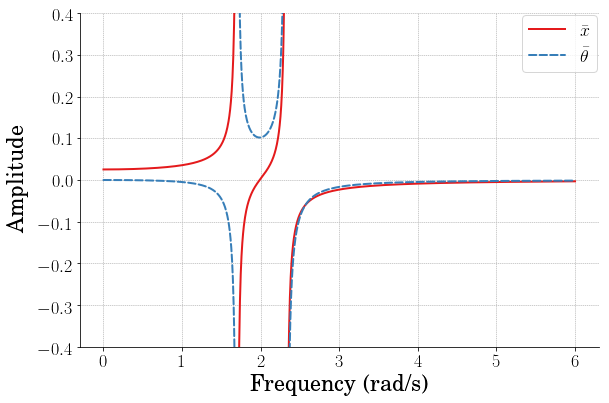

In [6]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to CMU Serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Frequency (rad/s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Amplitude',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(w,X[:,0],linewidth=2,label=r'$\bar{x}$')
plt.plot(w,X[:,1],linewidth=2,linestyle="--",label=r'$\bar{\theta}$')

# uncomment below and set limits if needed
# plt.xlim(0,4.5)
plt.ylim(-0.4,0.40)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('Spring_Pendulum_Example_Amp.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

We could also plot the magnitude of the response

/Users/josh/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in absolute
/Users/josh/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in absolute


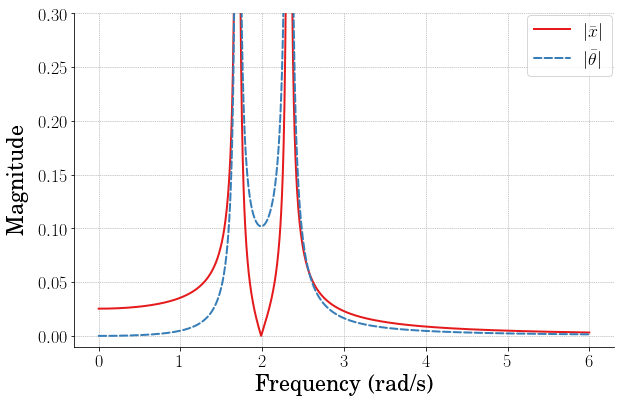

In [7]:
# Plot the magnitude of the response

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to CMU Serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Frequency (rad/s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Magnitude', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(w, np.abs(X[:,0]), linewidth=2, label=r'$|\bar{x}|$')
plt.plot(w, np.abs(X[:,1]), linewidth=2, linestyle="--", label=r'$|\bar{\theta}|$')

# uncomment below and set limits if needed
# plt.xlim(0,4.5)
plt.ylim(-0.01, 0.3)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('Spring_Pendulum_Example_Mag.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## A Vibration Absorber!?!?!
In this case, we can see that there is some frequency that the pendulum acts as a vibration absorber for $m_1$ (*i.e.* The magnitude of the $x$ response, $|\bar{x}|$, goes to zero at that frequency.).
<br>
<br>

## Time Response
Let's take a look at the time response to confirm this phenomenon. To do so, we'll have to represent our equations of motion as a system of first order ODEs, rather than two second-order ODEs. This is the beginning of putting the equations into state space form.

Define a state vector $\mathbf{w} = \left[x \quad \dot{x} \quad \theta \quad \dot{\theta}\right]^T $

*Note*: We'll most often see the state space form writen as:

$ \quad \dot{w} = Aw + Bu $

where $x$ is the state vector, $A$ is the state transition matrix, $B$ is the input matrix, and $u$ is the input. We'll use w here and in the code to avoid confusion with our state $x$, the position of $m_1$.

To begin, let's write the two equations of motion as:

$ \quad \ddot{x} = \frac{1}{m_1 + m_2} \left(m_2 l \ddot{\theta} - k x + f \right)$

$ \quad  \ddot{\theta}= \frac{1}{m_2 l^2} \left(m_2 l \ddot{x} - m_2 g l \theta\right) = \frac{1}{l}\ddot{x} - \frac{g}{l}\theta   $

After some algebra and using the state vector defined above, we can write our equations of motion as:

$ \quad \dot{\mathbf{w}} = \begin{bmatrix}0 & 1 & 0 & 0\\ -\frac{k}{m_1} & 0 & -\frac{m_2}{m_1}g & 0 \\ 0 & 0 & 0 & 1 \\ -\frac{k}{m 1} & 0 & -\left(\frac{m_1 + m_2}{m_1}\right)\frac{g}{l} & 0 \end{bmatrix}\mathbf{w} + \begin{bmatrix}0 \\ 1 \\ 0 \\ \frac{1}{l} \end{bmatrix} f $

Now, let's write this in a way that our ODE solver can use it.

In [8]:
# Define the system as a series of 1st order ODES (beginnings of state-space form)
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x, x_dot, theta, theta_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m1, m2, k, c, l, g, wf]
    
    Returns:
        sysODE : An list representing the system of equations of motion as 1st order ODEs
    """
    x, x_dot, theta, theta_dot = w
    m1, m2, k, c, l, g, wf = p

    # Create sysODE = (x', x_dot'):
    sysODE = [x_dot,
              -k/m1 * x - m2/m1 * g * theta + f(t,p),
              theta_dot,
              -k/(m1 * l) * x - (m1 + m2)/m1 * g/l * theta + f(t,p)/l]
    return sysODE



# Define the forcing function
def f(t,p):
    """ 
    Defines the forcing function
    
    Arguments:
        t : time
        p :  vector of the parameters:
             p = [m1, m2, k, l, g, wf]
    
    Returns:
        f : forcing function at current timestep
    """
    
    m1, m2, k, c, l, g, wf = p
    
    # Uncomment below for no force input - use for initial condition response
    #f = 0.0 
    
    # Uncomment below for sinusoidal forcing input at frequency wf rad/s
    f = np.sin(wf * t)
    
    return f

In [9]:
# Set up simulation parameters 

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 100.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.,stoptime,numpoints)

# Initial conditions
x_init = 0.0                        # initial position
x_dot_init = 0.0                    # initial velocity
theta_init = 0.0                    # initial angle
theta_dot_init = 0.0                # initial angular velocity

wf = np.sqrt(k / m1)                  # forcing function frequency

# Pack the parameters and initial conditions into arrays 
p = [m1, m2, k, c, l, g, wf]
x0 = [x_init, x_dot_init, theta_init, theta_dot_init]

In [10]:
# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

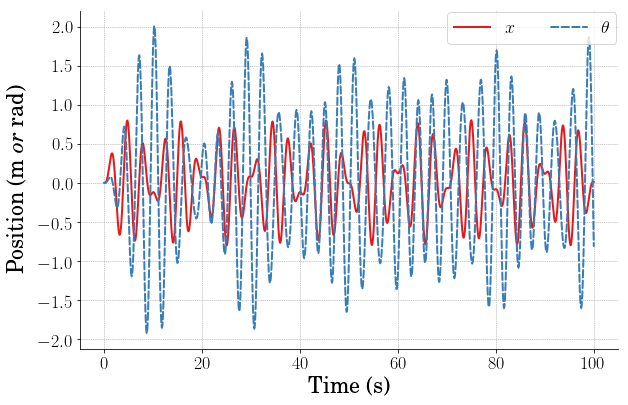

In [11]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'Position (m \textit{or} rad)',family='serif',fontsize=22,weight='bold',labelpad=10)
# plt.ylim(-1.,1.)

# plot the response
plt.plot(t,resp[:,0], linestyle = '-', linewidth=2, label = '$x$')
plt.plot(t,resp[:,2], linestyle = '--', linewidth=2, label = r'$\theta$')

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('Spring_Pendulum_Example_TimeResp_Undamped.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## Wait... It's *NOT* a Vibration Absorber?!?!?
Remember that our frequency domain analysis assumes steady-state responses. In this simulation, that is not the case. We have some *transient* oscillation that occurs as our system transitions from rest to being forced according to $f(t)$. If the system has no damping, like this one, then this transient response never decays.

Notice, however, that the ampliude of $x(t)$ is bounded. It would not be without the attached pendulum. (We're forcing at the $m_1/k$ subystem's natural frequency, so it would grow to inifinity.)

Now, let's investigate how the system would behave with even a small amount of damping (which all *real* systems have). Let's just add a light damper between $m_1$ and ground, in parallel with the spring and of damping coefficient $c$, as shown in Figure 2.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/Spring_mass_pendulum_damped.png" alt="An Damped Mass-Spring-Pendulum System" width=40%><br>
    <strong> Figure 2: An Damped Multi-Degree-of-Freedom System</strong>
</p><br>

In [12]:
# Define the system as a series of 1st order ODES (beginnings of state-space form)
def eq_of_motion_damped(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x, x_dot, theta, theta_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m1, m2, k, l, g, wf]
                  
    Returns:
        sysODE : An list representing the system of equations of motion as 1st order ODEs
    """
    x, x_dot, theta, theta_dot = w
    m1, m2, k, c, l, g, wf = p

    # Create sysODE = (x', x_dot'):
    sysODE = [x_dot,
              -k/m1 * x  - c/m1 * x_dot - m2/m1 * g * theta + f(t,p),
              theta_dot,
              -k/(m1 * l) * x - c/(m1 * l) * x_dot - (m1 + m2)/m1 * g/l * theta + f(t,p)/l]
    return sysODE

In [13]:
# Call the ODE solver.
resp_damped = odeint(eq_of_motion_damped, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

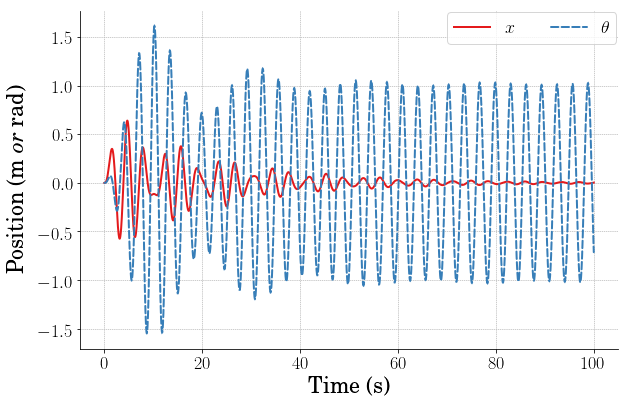

In [14]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'Position (m \textit{or} rad)',family='serif',fontsize=22,weight='bold',labelpad=10)
# plt.ylim(-1.,1.)

# plot the response
plt.plot(t,resp_damped[:,0], linestyle = '-', linewidth=2, label = '$x$')
plt.plot(t,resp_damped[:,2], linestyle = '--', linewidth=2, label = r'$\theta$')

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('Spring_Pendulum_Example_TimeResp_Damped.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

# Ahhh... Now it's a Vibration Absorber?
In this response, we can see that the damper eventually drives the transient vibration to zero, and, given enough time, the response of $x$ would approach zero as well. The peak-to-peak amplitude of the pendulum oscillation would also approach a constant value.

<hr style="border: 0px;
        height: 1px;
        text-align: center;
        background: #333;
        background-image: -webkit-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:    -moz-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:     -ms-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:      -o-linear-gradient(left, #ccc, #333, #ccc);">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [15]:
# This cell will just improve the styling of the notebook
# You can ignore it, if you are okay with the default styling
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))